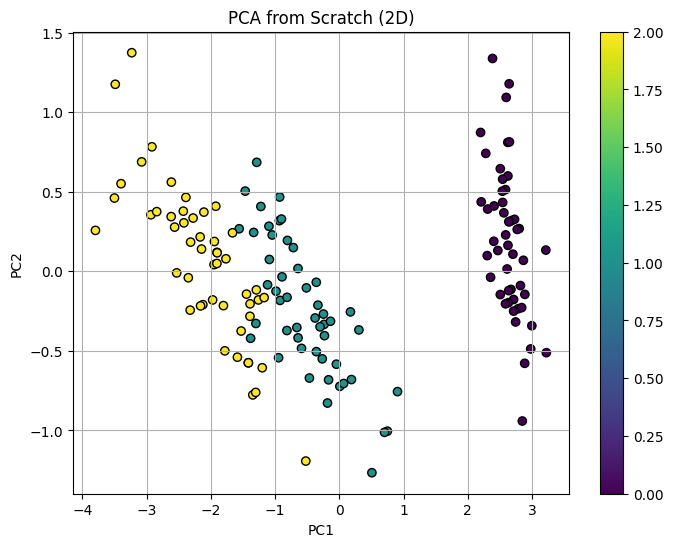

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X = data.data  # shape (150, 4)

# Step 1: Center the data
X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)

# Step 3: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

# Step 4: Sort eigenvectors by eigenvalues
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Step 5: Pick top k eigenvectors
n_components = 2
top_eig_vecs = eig_vecs[:, :n_components]

# Step 6: Project the data
X_reduced = X_meaned @ top_eig_vecs

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=data.target, cmap='viridis', edgecolor='k')
plt.title('PCA from Scratch (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.grid(True)
plt.show()
